In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [7]:
fc = pd.read_csv('food_consumption.csv')
fc.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


### GROUPING DATA AND FINDING MEAN AND MEDIAN

In [8]:
be_consumption = fc[fc['country']=='Belgium']
usa_consumption = fc[fc['country']=='USA']

In [9]:
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

42.132727272727266
12.59


In [10]:
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

44.650000000000006
14.58


In [11]:
be_and_usa = fc[(fc['country']=='Belgium') | (fc['country']=='USA')]
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


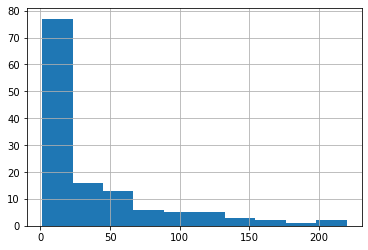

In [12]:
rice_consumption = fc[fc['food_category']=='rice']
rice_consumption['co2_emission'].hist()
plt.show()

### FINDING VARIANCE, STD AND QUANTILES

In [13]:
print(np.quantile(fc['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [14]:
print(np.quantile(fc['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [16]:
print(np.quantile(fc['co2_emission'], np.linspace(0, 1, 10)))

[0.00000000e+00 9.05555556e-01 4.19111111e+00 8.05333333e+00
 1.32000000e+01 2.10944444e+01 3.58666667e+01 7.90622222e+01
 1.86115556e+02 1.71200000e+03]


In [17]:
print(fc.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


### USING HISTOGRAMS TO DATA VISUALIZATION

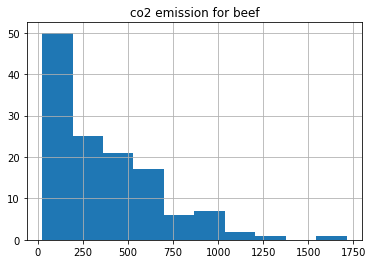

In [18]:
fc[fc['food_category']=='beef']['co2_emission']. hist()

plt.title('co2 emission for beef')
plt.show()

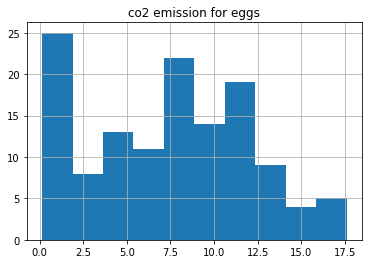

In [19]:
fc[fc['food_category']=='eggs']['co2_emission']. hist()

plt.title('co2 emission for eggs')
plt.show()

In [20]:
emissions_by_country = fc.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


### FINDING OUTLIERS USING IQR

In [21]:
emissions_by_country = fc.groupby('country')['co2_emission'].sum()

In [22]:
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

In [23]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [24]:
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
